In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm

from neupy import utils
from neupy.algorithms import GrowingNeuralGas as GNG

utils.reproducible()

In [4]:
columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash ', 'magnesium', 
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 
           'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df = pd.read_csv('./data/wine.data', names=columns)
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


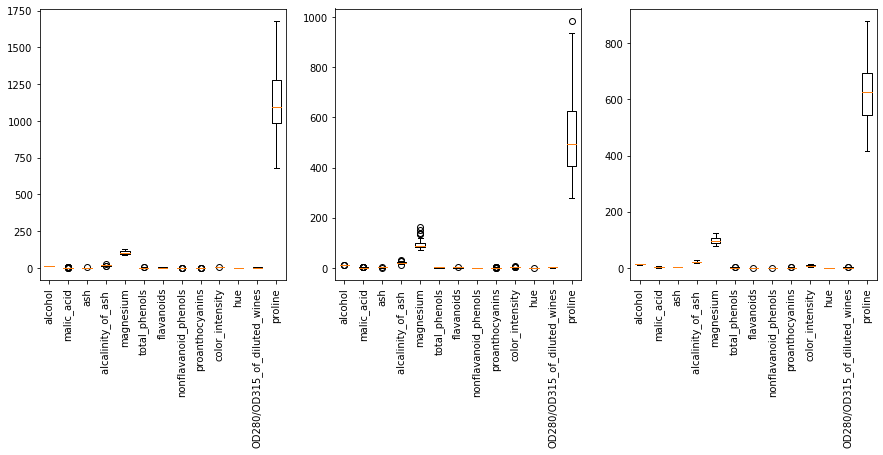

In [13]:
t1 = df[df['class'] == 1]
t2 = df[df['class'] == 2]
t3 = df[df['class'] == 3]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
boxes = []
for col in df.columns[1:]:
    boxes.append(t1[col].values)
_ = ax[0].boxplot(boxes)
_ = ax[0].set_xticklabels(df.columns[1:], rotation=90)

boxes = []
for col in df.columns[1:]:
    boxes.append(t2[col].values)
_ = ax[1].boxplot(boxes)
_ = ax[1].set_xticklabels(df.columns[1:], rotation=90)

boxes = []
for col in df.columns[1:]:
    boxes.append(t3[col].values)
_ = ax[2].boxplot(boxes)
_ = ax[2].set_xticklabels(df.columns[1:], rotation=90)

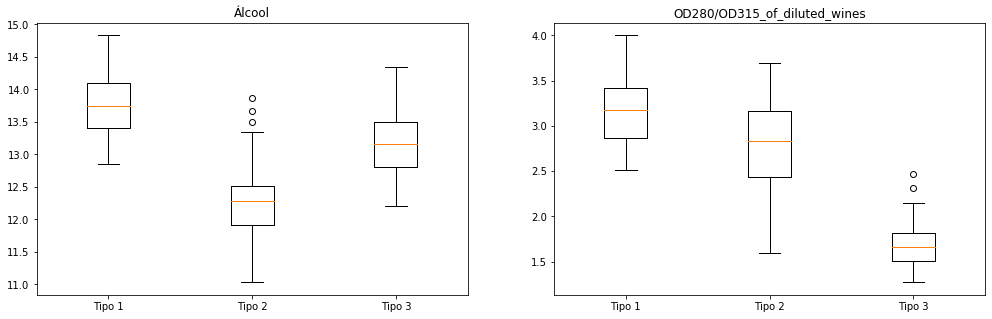

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].set_title('Álcool')
_ = ax[0].boxplot([df[df["class"] == 1]['alcohol'].values,
            df[df["class"] == 2]['alcohol'].values, 
            df[df["class"] == 3]['alcohol'].values])
_ = ax[0].set_xticklabels(['Tipo 1', 'Tipo 2', 'Tipo 3'])

ax[1].set_title('OD280/OD315_of_diluted_wines')
_ = ax[1].boxplot([df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values,
            df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, 
            df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values])
_ = ax[1].set_xticklabels(['Tipo 1', 'Tipo 2', 'Tipo 3'])

plt.savefig('results/box_wine.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)

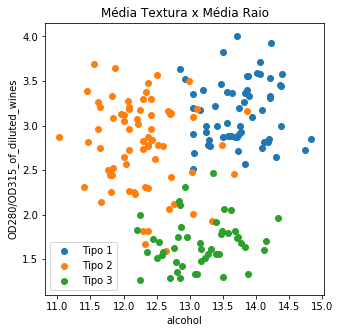

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Média Textura x Média Raio')
ax.scatter(df[df["class"] == 1]['alcohol'].values,
            df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
ax.scatter(df[df["class"] == 2]['alcohol'].values,
            df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
ax.scatter(df[df["class"] == 3]['alcohol'].values,
            df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')

ax.set_xlabel('alcohol')
ax.set_ylabel('OD280/OD315_of_diluted_wines')
ax.legend()


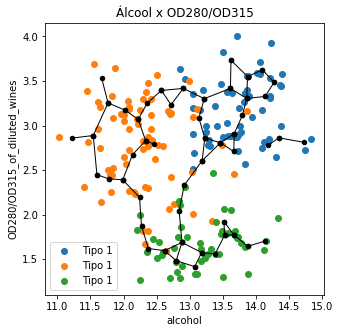

In [18]:
nodes, max_age, max_nodes = 2, 25, 50

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Álcool x OD280/OD315')
ax.scatter(df[df["class"] == 1]['alcohol'].values,
            df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
ax.scatter(df[df["class"] == 2]['alcohol'].values,
            df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
ax.scatter(df[df["class"] == 3]['alcohol'].values,
            df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')

ax.set_xlabel('alcohol')
ax.set_ylabel('OD280/OD315_of_diluted_wines')
ax.legend()


data = df[['alcohol', 'OD280/OD315_of_diluted_wines']].values
gng = GNG(n_inputs=nodes, max_edge_age=max_age, max_nodes=max_nodes)


gng.train(data, epochs=500)

for node_1, node_2 in gng.graph.edges:
#     print(node_2.weight)
    weights = np.concatenate([node_1.weight, node_2.weight])
    plt.plot(*weights.T, color='k', linewidth=1)
    plt.scatter(*weights.T, color='k', s=20)

idx:  0


idx:  1


idx:  2


idx:  3


idx:  4


idx:  5


idx:  6


idx:  7


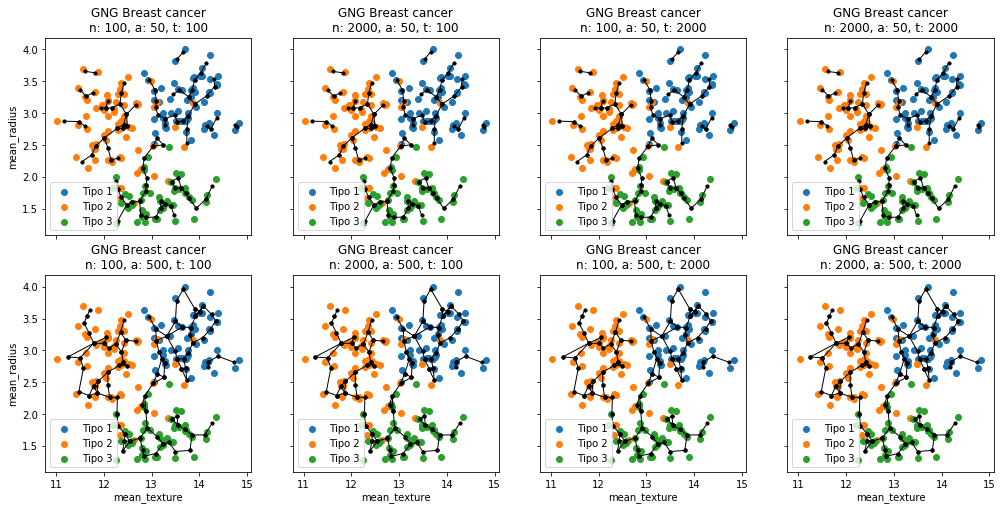

In [19]:
fig, ax = plt.subplots(2, 4, figsize=(17, 8), sharex=True, sharey=True)

max_edge_ages = [50, 500] #default 100
n_iter_before_neuron_added = [100, 2000] # default 1000
n_nodes = [100, 2000] #default 1000

idxs = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]
idx = 0
for age in max_edge_ages:
    for it in n_iter_before_neuron_added:
        for node in n_nodes:
            print('idx: ', idx)
            x, y = idxs[idx][0], idxs[idx][1]
            gng = GNG(n_inputs=2, max_edge_age=age, max_nodes=node)
            gng.train(data, 500)
            ax[x][y].set_title('GNG Breast cancer\nn: %s, a: %s, t: %s'%(node, age, it))
            ax[x][y].scatter(df[df["class"] == 1]['alcohol'].values,
                        df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
            ax[x][y].scatter(df[df["class"] == 2]['alcohol'].values,
                        df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
            ax[x][y].scatter(df[df["class"] == 3]['alcohol'].values,
                        df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')
            
            if x == 1:
                ax[x][y].set_xlabel('mean_texture')
            if y == 0:
                ax[x][y].set_ylabel('mean_radius')
            ax[x][y].legend()
            
            for node_1, node_2 in gng.graph.edges:
                weights = np.concatenate([node_1.weight, node_2.weight])
                ax[x][y].plot(*weights.T, color='k', linewidth=1)
                ax[x][y].scatter(*weights.T, color='k', s=10)
            
            idx+=1

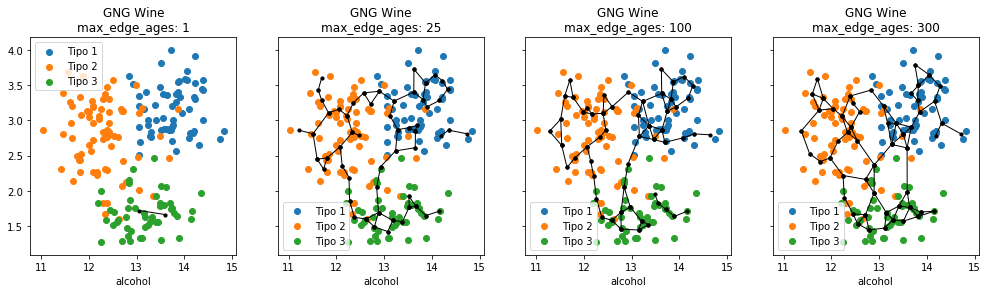

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

max_edge_ages = [1, 25, 100, 300]
# n_iter_before_neuron_added = [100, 2000]
# n_nodes = [100, 2000]

for i, age in enumerate(max_edge_ages):
    gng = GNG(n_inputs=2, max_edge_age=age)
    gng.train(data, 300)
    ax[i].set_title('GNG Wine\nmax_edge_ages: %s'%age)
    ax[i].scatter(df[df["class"] == 1]['alcohol'].values,
                df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
    ax[i].scatter(df[df["class"] == 2]['alcohol'].values,
                df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
    ax[i].scatter(df[df["class"] == 3]['alcohol'].values,
                df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')

    if x == 1:
        ax[i].set_xlabel('alcohol')
    if y == 0:
        ax[i].set_ylabel('OD280/OD315_of_diluted_wines')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_003_age.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)

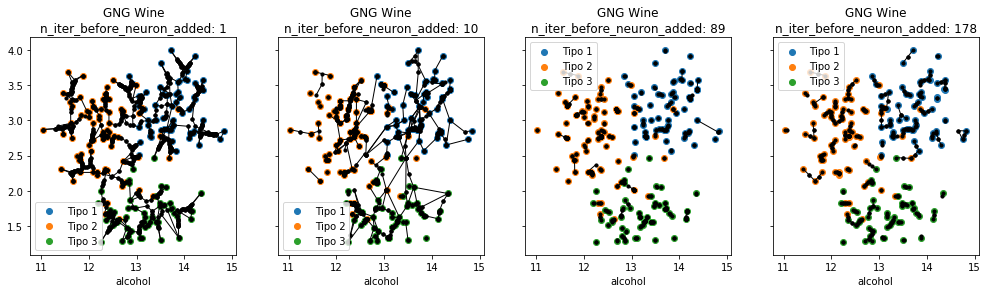

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

# max_edge_ages = [1, 25, 100, 500]
n_iter_before_neuron_added = [1, 10, 89, 178]
# n_nodes = [100, 2000]

for i, time in enumerate(n_iter_before_neuron_added):
    gng = GNG(n_inputs=2, n_iter_before_neuron_added=time)
    gng.train(data, 300)
    ax[i].set_title('GNG Wine\nn_iter_before_neuron_added: %s'%time)
    ax[i].scatter(df[df["class"] == 1]['alcohol'].values,
                df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
    ax[i].scatter(df[df["class"] == 2]['alcohol'].values,
                df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
    ax[i].scatter(df[df["class"] == 3]['alcohol'].values,
                df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')

    if x == 1:
        ax[i].set_xlabel('alcohol')
    if y == 0:
        ax[i].set_ylabel('OD280/OD315_of_diluted_wines')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_003_time.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)

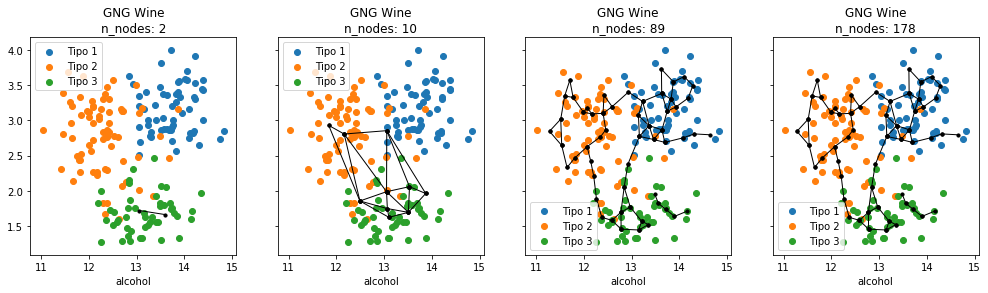

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

# max_edge_ages = [1, 25, 100, 500]
# n_iter_before_neuron_added = [1, 50, 100, 150]
n_nodes = [2, 10, 89, 178]

for i, nodes in enumerate(n_nodes):
    gng = GNG(n_inputs=2, max_nodes=nodes)
    gng.train(data, 300)
    ax[i].set_title('GNG Wine\nn_nodes: %s'%nodes)
    ax[i].scatter(df[df["class"] == 1]['alcohol'].values,
                df[df["class"] == 1]['OD280/OD315_of_diluted_wines'].values, label='Tipo 1')
    ax[i].scatter(df[df["class"] == 2]['alcohol'].values,
                df[df["class"] == 2]['OD280/OD315_of_diluted_wines'].values, label='Tipo 2')
    ax[i].scatter(df[df["class"] == 3]['alcohol'].values,
                df[df["class"] == 3]['OD280/OD315_of_diluted_wines'].values, label='Tipo 3')

    if x == 1:
        ax[i].set_xlabel('alcohol')
    if y == 0:
        ax[i].set_ylabel('OD280/OD315_of_diluted_wines')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_003_nodes.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)